<a href="https://colab.research.google.com/github/Maher1410/NN-LABS/blob/main/Lab_1_%26_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install scikeras

In [2]:
import numpy
import pandas
from keras.models import Sequential
from keras.layers import Dense
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [3]:
seed=7

In [4]:
numpy.random.seed(seed)

In [5]:
df = pandas.read_csv("/content/drive/MyDrive/LABNN/sonar.csv", header=None)

In [6]:
dataset = df.values

In [7]:
X=dataset[:,0:60].astype(float)
Y=dataset[:,60]

In [8]:
encoder = LabelEncoder()

In [9]:
encoder.fit(Y)

LabelEncoder()

In [10]:
encoded_Y= encoder.transform(Y)

In [11]:
#baseline model
def create_baseline():
  model = Sequential()
  model.add(Dense(60, input_dim=60, activation= 'relu'))
  model.add(Dense(1, activation= 'sigmoid'))
#compil model
  model.compile(loss='binary_crossentropy' , optimizer='adam', metrics=['accuracy'])
  return model

In [12]:
x_train,x_test,y_train,y_test = train_test_split (X,encoded_Y,test_size=0.3)

In [13]:
model = create_baseline()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model.fit(x_train,y_train,epochs=100)

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5896 - loss: 0.6854
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6304 - loss: 0.6686 
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6022 - loss: 0.6580 
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6636 - loss: 0.6368 
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6601 - loss: 0.6337 
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7218 - loss: 0.6210 
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7322 - loss: 0.6271 
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7731 - loss: 0.6182 
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8119 - loss: 0.5983 
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7652 - loss: 0.6026 
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7932 - loss: 0.5924 
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7799 - loss

In [15]:
results = model.evaluate(x_test,y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.8001 - loss: 0.4278 


In [16]:
results

[0.4110858738422394, 0.8095238208770752]

In [17]:
y_predicted = model.predict(x_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


In [18]:
y_predicted

array([[0.587231  ],
       [0.19406052],
       [0.5512668 ],
       [0.11964962],
       [0.03901562],
       [0.3761214 ],
       [0.3644574 ],
       [0.08749232],
       [0.9721669 ],
       [0.4836102 ],
       [0.8515542 ],
       [0.2610735 ],
       [0.22789544],
       [0.08158429],
       [0.98042   ],
       [0.97769266],
       [0.4331203 ],
       [0.95988864],
       [0.21763094],
       [0.49473915],
       [0.2536654 ],
       [0.00212661],
       [0.44646245],
       [0.08681938],
       [0.674429  ],
       [0.33315057],
       [0.9372061 ],
       [0.03822201],
       [0.33282322],
       [0.2661336 ],
       [0.94906133],
       [0.19450308],
       [0.7178467 ],
       [0.54946005],
       [0.87175685],
       [0.03019461],
       [0.03115332],
       [0.5005978 ],
       [0.05561273],
       [0.10727416],
       [0.46530375],
       [0.81104004],
       [0.6769153 ],
       [0.15592402],
       [0.87712246],
       [0.4892162 ],
       [0.6854574 ],
       [0.919

In [19]:
y_pred = [1 if val>=0.5 else 0 for val in y_predicted]

In [20]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import matplotlib.pyplot as plt

In [21]:
cm = confusion_matrix(y_true=y_test, y_pred= y_pred)

Text(95.72222222222221, 0.5, 'Truth')

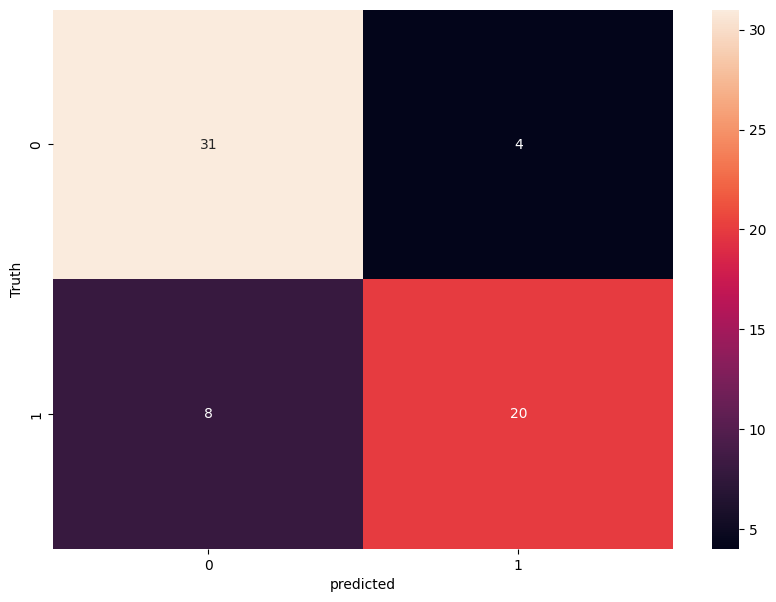

In [24]:
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('predicted')
plt.ylabel('Truth')

In [25]:
acc_train = (cm[0,0]+cm[1,1])/sum(sum(cm))

In [26]:
print ("\naccuracy: ",acc_train)


accuracy:  0.8095238095238095
